In [1]:
import pandas as pd
import seaborn as sns
#palette = sns.color_palette('pastel') # venn diagrams do not look good with this palette


In [2]:
# methods
def get_set(x, column='compatible_products'):
    return set(df[column][x].split(', '))

In [12]:
cover_id="k"
df = pd.read_csv(f'cover_{cover_id}_format_t0p5.tsv', delimiter='\t')


In [4]:
# Find unique products

for idx,row in df.iterrows():
    curr =  get_set(idx)
    others = [get_set(idx2) for idx2,row in df.iterrows() if idx2 != idx]
    unique = curr.difference(*others)
    print('Design',row['Solution index'], 'unique:', unique)



Design 82 unique: {'pg140', '2hdecg3p', '2odec11eg3p', '1agpg180', 'pe140', 'pg161', 'pg141', '2hdec9eg3p', 'pgp161', '2agpg180', '1ddecg3p', 'pg120', 'pgp141', 'pgp140', 'pe141', 'ps140', 'apg120', 'ps120', 'pgp120', 'pe120', 'lipidX', '2tdecg3p', '2odecg3p', 'ps141'}
Design 121 unique: {'for', '23dhmb', 'etoh'}
Design 124 unique: {'succ'}


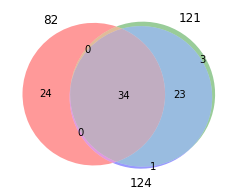

In [13]:
# Plot venn diagram (for 3 only)

# get list of sets
sets = [get_set(idx) for idx,row in df.iterrows()]
set_labels = [row['Solution index'] for idx,row in df.iterrows()]
# plot
from matplotlib import pyplot as plt
from matplotlib_venn import venn3

plt.figure(figsize=(4,4))
# s is a list of sets
vd = venn3(sets, set_labels = set_labels)

#plt.show()
plt.savefig(f'cover_{cover_id}_venn.svgz')

In [6]:
print("Total compatible products:", len(set.union(*sets)))

Total compatible products: 85


In [7]:
# Venn of deletions
del_sets = [get_set(idx,'Deletion_id') for idx,row in df.iterrows()]

In [8]:
del_sets

[{'ALCD2x', 'FLDR2', 'LDH_D', 'PPC'},
 {'ACALD', 'ACKr', 'ALCD2x', 'FUM', 'LDH_D'},
 {'ACALD', 'ACKr', 'ALCD2x', 'LDH_D', 'MDH'}]

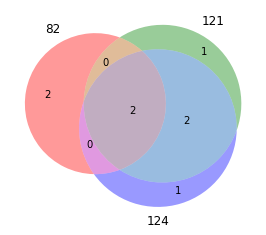

In [9]:
vd = venn3(del_sets, set_labels = set_labels)

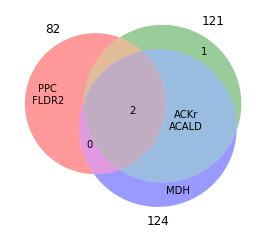

In [10]:
#A = set(['DPEP1', 'CDC42BPA', 'GNG4', 'RAPGEFL1', 'MYH7B', 'SLC13A3', 'PHACTR3', 'SMPX', 'NELL2', 'PNMAL1', 'KRT23', 'PCP4', 'LOX', 'CDC42BPA'])
#B = set(['ABLIM1','CDC42BPA','VSNL1','LOX','PCP4','SLC13A3'])
#C = set(['PLCB4', 'VSNL1', 'TOX3', 'VAV3'])
A = del_sets[0]
B = del_sets[1]
C = del_sets[2]
#v = venn3([A,B,C], ('GCPromoters', 'OCPromoters', 'GCSuppressors'))

v = venn3(del_sets, set_labels = set_labels)

v.get_label_by_id('100').set_text('\n'.join(A-B-C))
v.get_label_by_id('110').set_text('\n'.join(A&B-C))
v.get_label_by_id('011').set_text('\n'.join(B&C-A))
v.get_label_by_id('001').set_text('\n'.join(C-A-B))
#v.get_label_by_id('010').set_text('')

#plt.annotate(',\n'.join(B-A-C), xy=v.get_label_by_id('010').get_position() +
 #            np.array([0, 0.2]), xytext=(-20,40), ha='center',
  #           textcoords='offset points', 
   #          bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
    #         arrowprops=dict(arrowstyle='->',              
     #                        connectionstyle='arc',color='gray'))

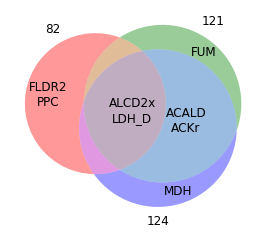

In [15]:
import math, itertools
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn3
import numpy as np

# Generate list index for itertools combinations
def gen_index(n):
    x = -1
    while True:       
        while True:
            x = x + 1
            if bin(x).count('1') == n:
                break
        yield x

# Generate all combinations of intersections
def make_intersections(sets):
    l = [None] * 2**len(sets)
    for i in range(1, len(sets) + 1):
        ind = gen_index(i)
        for subset in itertools.combinations(sets, i):
            inter = set.intersection(*subset)
            l[next(ind)] = inter
    return l

# Get weird reversed binary string id for venn
def number2venn_id(x, n_fill):
    id = bin(x)[2:].zfill(n_fill)
    id = id[::-1]
    return id

# Iterate over all combinations and remove duplicates from intersections with
# more sets
def sets2dict(sets):
    l = make_intersections(sets)
    d = {}
    for i in range(1, len(l)):
        d[number2venn_id(i, len(sets))] = l[i]
        for j in range(1, len(l)):
            if bin(j).count('1') < bin(i).count('1'):
                l[j] = l[j] - l[i]
                d[number2venn_id(j, len(sets))] = l[j] - l[i]
    return d

# Define some sets
sets = del_sets

d = sets2dict(sets)
# Plot it
h = venn3(sets, set_labels)
for k, v in d.items():
   l = h.get_label_by_id(k)
   if l:
       l.set_fontsize(12)
       l.set_text('\n'.join(sorted(v)))

plt.savefig(f'cover_{cover_id}_del_venn.svgz')
# Original for comparison
#f = plt.figure(2)
#venn3(sets, ('A', 'B', 'C'))  
#plt.show()

## Below is just testing

---

In [ ]:
# Better automate: Maybe create mc method that: given a formated pf (with only a list of genes) -> produces the products only compatible in specific designs